In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df_train = pd.read_csv('train.csv')

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df_train['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

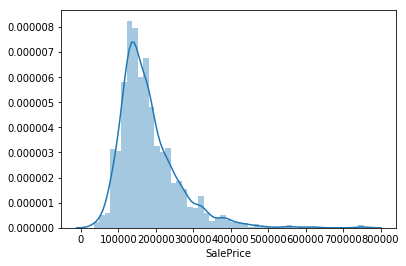

In [7]:
sns.distplot(df_train['SalePrice'])

In [8]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


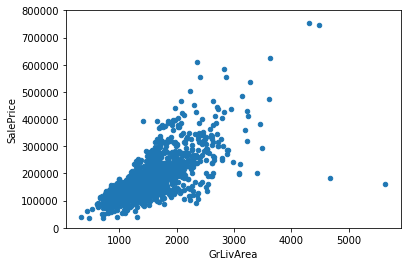

In [9]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

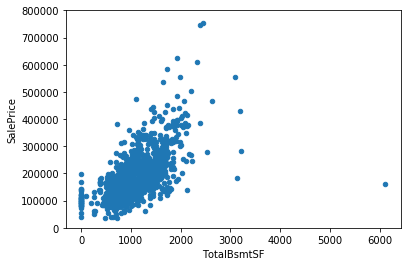

In [10]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [45]:
def plot_relationships_numerical(
    df,
    target,
    features,
    plot_width=8,
    plot_height=7,
):
    """Plot relationships with multiple numerical columns.
    
    Args:
        df: The dataframe from which we get the data to plot.
        target: Name of the target column.
        features: A list of column names. A plot is drawn for each column
            in the list, showing its relationship with the target column.
        plot_width: Width of each subplot.
        plot_height: Height of each subplot.
    Returns:
        None
    """
    n_features = len(features)
    n_cols = min(2, n_features)
    n_rows = (n_features + n_cols - 1) // n_cols
    figsize = (plot_width*n_cols, plot_height*n_rows)
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols,
                           figsize=figsize)
    if n_rows == 1:
        ax = [ax]
    if n_cols == 1:
        ax = [[x] for x in ax]
    
    i = 0
    for row in range(n_rows):
        for col in range(n_cols):
            if i >= n_features:
                break
            sns.scatterplot(x=df[features[i]],
                            y=df[target],
                            ax=ax[row][col])
            i += 1
    plt.show()

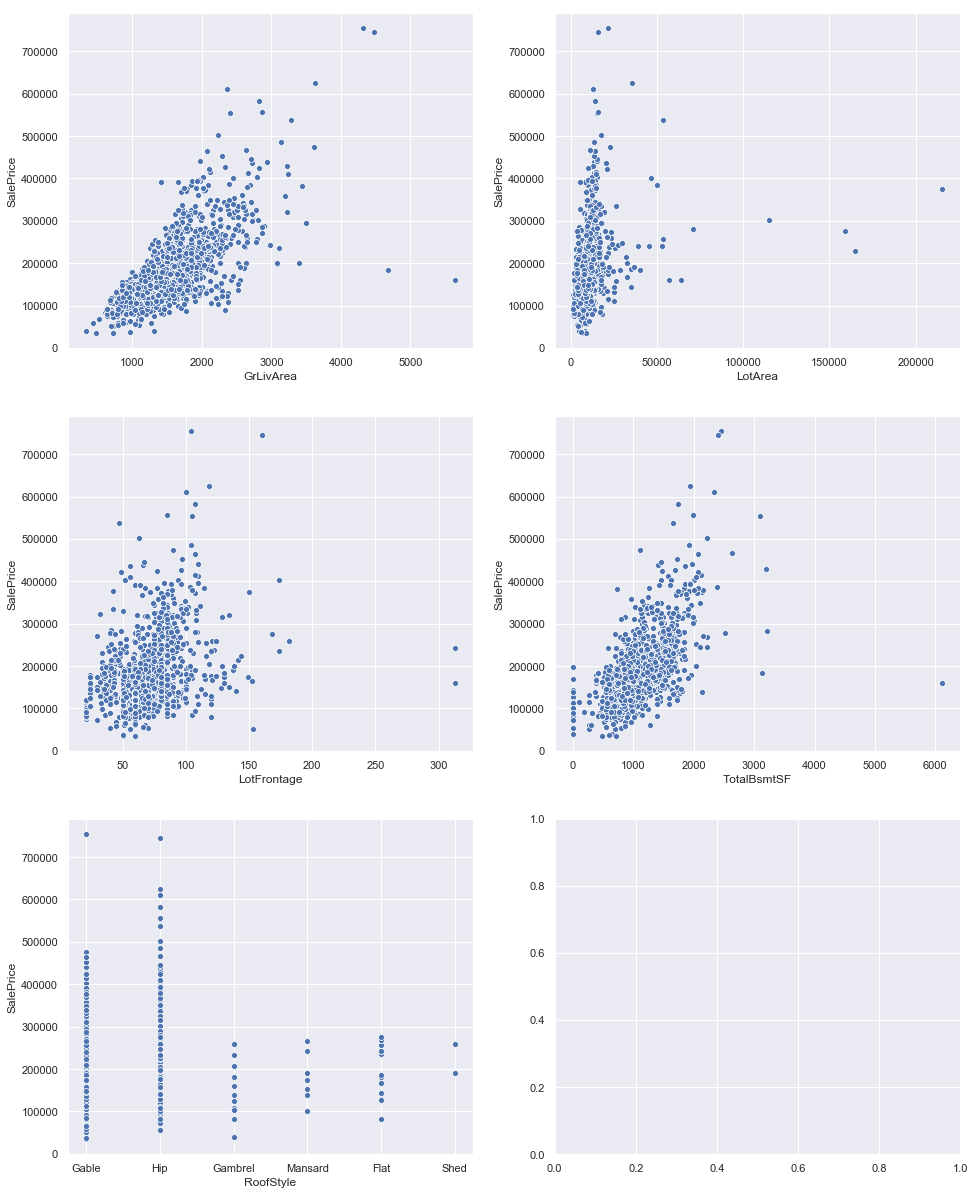

In [48]:
numerical_features = [
    'GrLivArea',
    'LotArea',
    'LotFrontage',
    'TotalBsmtSF',
    'RoofStyle'
]
#numerical_features = list(df_train.columns)
plot_relationships_numerical(df_train, 'SalePrice', numerical_features)

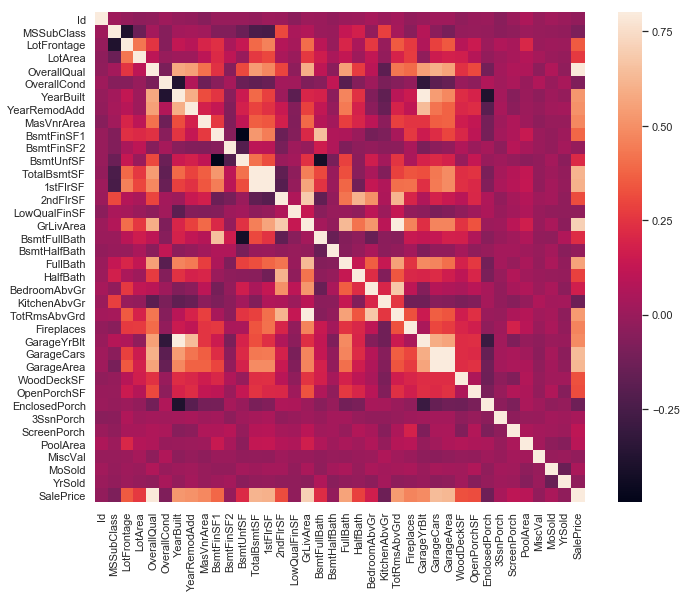

In [49]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

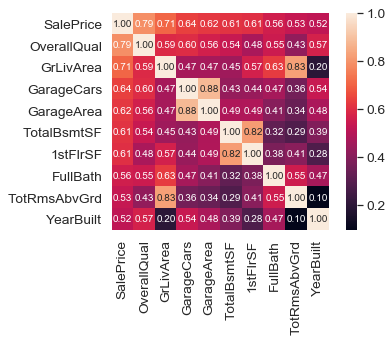

In [52]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [63]:
total = df_train.isnull().sum().sort_values(ascending=False)
missing_data = pd.DataFrame({'Total': total})
missing_data["percent"] = pd.DataFrame({'Total': total}) / len(df_train)
print(missing_data[missing_data["percent"] > 0.05])

              Total   percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
